# Tugas Morfologi Pengukuran Berbasis Citra
 13519008 - Ronggur Mahendra

In [60]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

In [61]:
# load image sebagai grayscale
img = cv2.imread("./coin.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


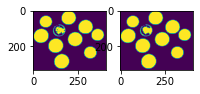

In [62]:
#threshold input imahe menggunakan otsu thresholding sebagai mask dan refine pake morpology

blur = cv2.GaussianBlur(gray,(5,5),0)
ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((5,5), np.uint8)
plt.subplot(1,4,1),
plt.imshow(mask)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) #dilation -> errosion
plt.subplot(1,4,2)
plt.imshow(mask)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) #errosion -> dilation
# plt.subplot(1,4,3)
# plt.imshow(mask)
# mask = cv2.morphologyEx(mask, cv2.MORPH_CROSS, kernel) #errosion -> dilation
# plt.subplot(1,4,4)
# plt.imshow(mask)

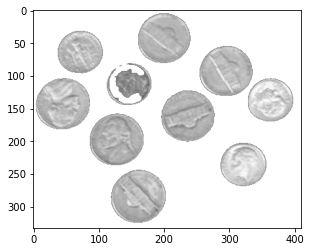

In [63]:
# mask -> channel baru -> result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

plt.imshow(result)

coins in the image :  11


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x236bbb17070>)

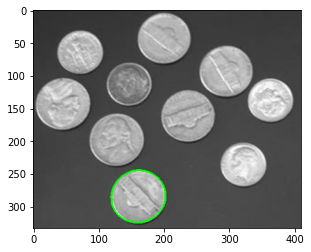

In [64]:
#extract coin yang diinginkan

(cnt, hierarchy) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("coins in the image : ", len(cnt))
colourTemp = img.copy()
idx = 0
cv2.drawContours(colourTemp, cnt[idx], -1, (0, 255, 0), 2)
plt.subplot(1,1,1),plt.imshow(colourTemp)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x236bcd03850>)

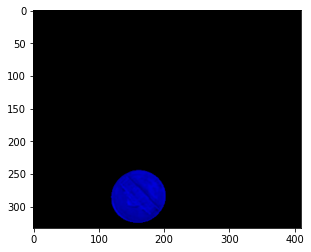

In [70]:
mask = np.zeros_like(result)
cv2.drawContours(mask, cnt, idx, 255, -1)
out = np.zeros_like(result)
out[mask == 255] = result[mask == 255]

plt.subplot(1,1,1),plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGRA2RGB))